# Perceptron
## Working Principle Introduction
The working principle of a perceptron is based on a linear equation. It computes a weighted sum of its input features and passes this sum through a step function, which determines the output. The weights in the perceptron are adjusted during the training process based on the input data. If the output is incorrect, the weights are tweaked proportionally to the error. This process continues iteratively, allowing the perceptron to learn from its mistakes and improve its predictions over time.

The core operation of the perceptron is to calculate a weighted sum of the inputs plus a bias term, which is then passed through an activation function to produce the output. The formulas are as follows:

1. **Net Input (z):**
   $$ z = \sum_{i=1}^{n} w_i x_i + b $$

   Here, \( w_i \) are the weights, \( x_i \) are the input features, \( b \) is the bias, and \( n \) is the number of features.

2. **Activation Function:**
   $$ y = \begin{cases} 
   1 & \text{if } z \geq 0 \\
   -1 & \text{otherwise} 
   \end{cases} $$
   
 <div align="center">
<img src="Perceptron.jpg" alt="alt text" width="450"/>
</div>

This image depicts the structure of a simple perceptron model. It consists of multiple input units, each associated with a weight. The inputs are weighted and combined to generate a net input value, which is then passed through a single output neuron y. This neuron computes the model's output based on the net input value. The perceptron is a fundamental building block of neural networks and is used for binary classification tasks.

## Data Processing
I've preprocessed the breast cancer dataset for a perceptron model. I began by converting the target outcomes to binary values, -1 and 1, to match the perceptron's output. Next, I split the data into training and test subsets, reserving 30% for testing. To ensure that the perceptron algorithm works effectively, I've standardized the features using StandardScaler. 

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Preprocess the dataset
# Convert target to -1 and 1
X = cancer.data
y = cancer.target

# Convert target to -1 and 1
y = np.where(y == 0, -1, 1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


## Perceptron Model Implementation
I've coded a basic Perceptron class that learns to classify data over a set number of epochs. It adjusts its weights only when it misclassifies a data point, improving its accuracy incrementally. The train method updates the weights, and the predict method uses these weights to classify new inputs.

In [2]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Model Training and Evaluation
I instantiated the Perceptron with a learning rate of 0.1 and trained it over 1000 epochs using our standardized training data. After training, I used the model to predict outcomes on the standardized test set. The accuracy of the model was then evaluated by comparing these predictions to the actual test labels

In [3]:
# Create and train the Perceptron model
perceptron = Perceptron(eta=0.1, epochs=1000)
perceptron.train(X_train_std, y_train)

# Make predictions on the test set
y_test_pred = perceptron.predict(X_test_std)

# Calculate the accuracy on the test set
accuracy_test_y_pred = np.mean(y_test_pred == y_test)
accuracy_test_y_pred

0.9473684210526315

## Visualization
### Misclassification Error Plot
The first plot visualizes the number of misclassifications per iteration over the training epochs. This error plot helps in understanding how the model's performance improved with each epoch, indicating the learning progress.

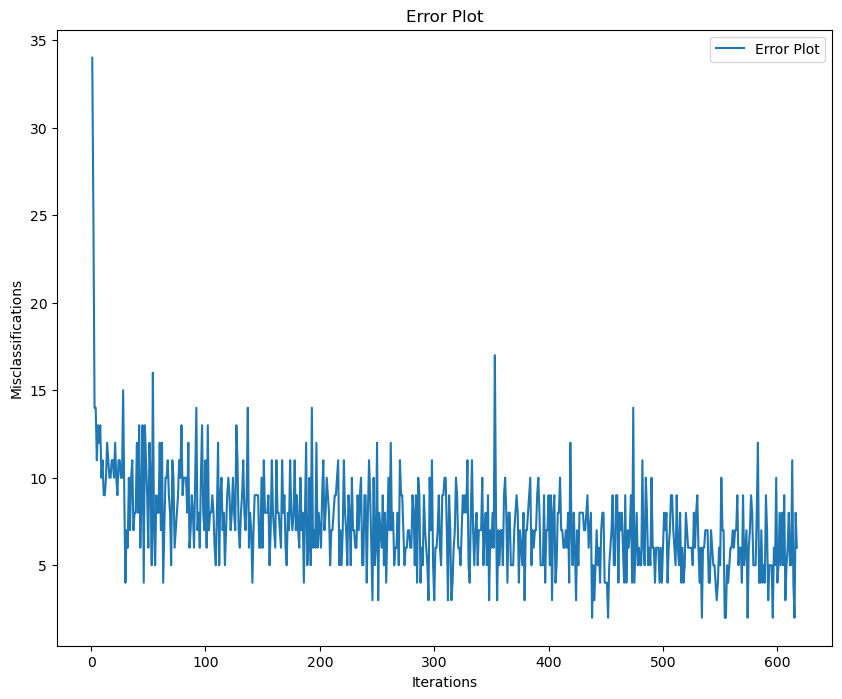

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(perceptron.errors_)+1), perceptron.errors_, label="Error Plot")
plt.xlabel("Iterations")
plt.ylabel("Misclassifications")
plt.title("Error Plot")
plt.legend()
plt.show()

### Decision Boundary Visualization
The second plot showcases the decision regions of our Perceptron model on the breast cancer dataset. By plotting the mean radius and mean texture features, it depicts how the Perceptron separates the data into two classes, providing a visual evaluation of the model's classification ability.

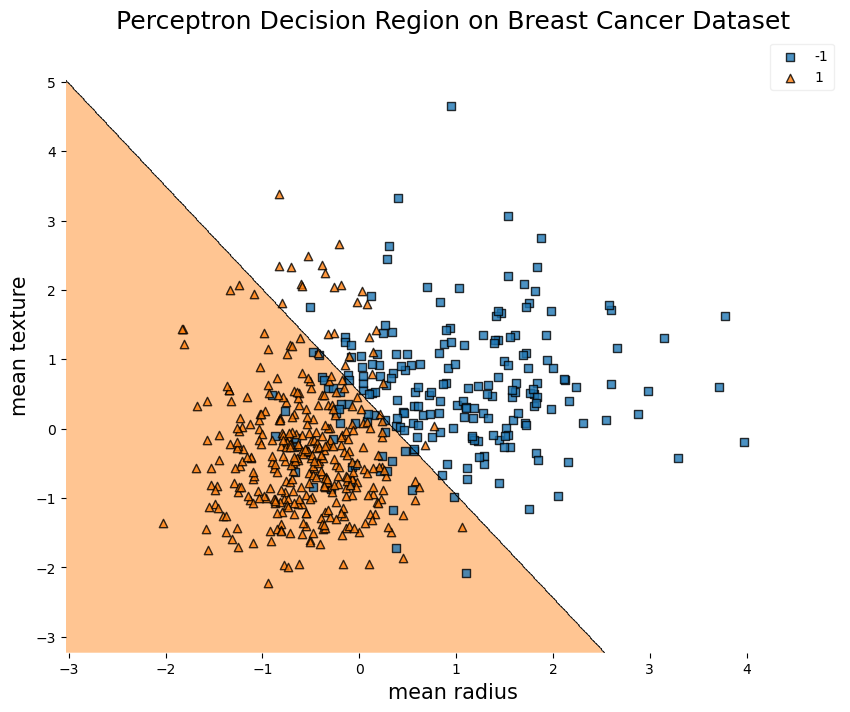

In [71]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# We can choose the first two features for simplicity.
feature_idx = [0, 1]  # Indexes for the first two features
X_selected = X[:, feature_idx]

# Reinitialize and fit the StandardScaler with the selected features
scaler_selected = StandardScaler()
X_selected_std = scaler_selected.fit_transform(X_selected)

# Recreate the Perceptron model with the selected features
clf_selected = Perceptron(eta=0.1, epochs=100)  # Reduced epochs for practicality
clf_selected.train(X_selected_std, y)

# Plotting decision regions
plt.figure(figsize=(10, 8))
plot_decision_regions(X_selected_std, y, clf=clf_selected)
plt.title("Perceptron Decision Region on Breast Cancer Dataset", fontsize=18)
plt.xlabel(cancer.feature_names[feature_idx[0]], fontsize=15)
plt.ylabel(cancer.feature_names[feature_idx[1]], fontsize=15)
plt.show()

## Conclusion
In conclusion, the perceptron model developed in this study demonstrated high predictive accuracy, exceeding 0.9 on the breast cancer dataset, which underscores its capability in binary classification tasks. The visualizations further clarified the model's decision-making process, reaffirming the perceptron's utility as a foundational machine learning algorithm.